In [314]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

rng = np.random.default_rng()

import multiprocessing as mp

In [358]:
ITERATIONS = 100000
t = 1
start = 0
theta = np.pi 

Exact Algorithm 1

1. Simulate Poisson process
2. Simulate skeleton
3. Acceptance indicator
4. accept/reject

1. Simualate poisson process:

In [36]:
def sequential_search(u,lam):
    x = 0.0
    p = np.exp(-lam)
    s = p

    while u>s:
        x = x+1
        p = lam*p/x
        s = s + p
    
    return int(x)

In [54]:
po_rate = 9.0/8.0

U = rng.random(ITERATIONS)

po = []
for u in U:
    k = sequential_search(u,po_rate*t)
    points = rng.uniform(low=0,high=t,size=k)
    marks = rng.random(size=k)


2. Simulate Skeleton

In [122]:
bm = np.concatenate([[0],rng.normal(0,np.diff(points,prepend=0,append=t)).cumsum()])
bb_0 = bm - (np.concatenate([[0],points,[t]])/t)*bm[-1]
bb = bb_0 + (1-(np.concatenate([[0],points,[t]])/t))*start + (np.concatenate([[0],points,[t]])/t)*end

3. Compute Acceptance Indicator

Loop

In [438]:
for i in range(ITERATIONS):

    if (i+1) % 100000 == 0:
        print((i+1)/ITERATIONS*100)

    accepted = False
    while ~accepted:


        # Simulate end point
        end_accept = False
        while end_accept==False:
            u = rng.random()
            x = rng.standard_normal()
            
            if u < np.exp(-np.cos(x)-1):
                end = x
                end_accept = True

        # Simulate marked poisson process
        u = rng.random()
        k = sequential_search(u,po_rate*t)
        points = rng.uniform(low=0,high=t,size=k)
        marks = rng.random(size=k)
        points.sort()


        # Simulate proposal distribution
        bm = np.concatenate([[0],rng.normal(0,np.diff(points,prepend=0,append=t)).cumsum()])
        bb_0 = bm - (np.concatenate([[0],points,[t]])/t)*bm[-1]
        bb = bb_0 + (1-(np.concatenate([[0],points,[t]])/t))*start + (np.concatenate([[0],points,[t]])/t)*end

        # Calculate acceptance
        phi = 8.0/9.0 * (np.square(np.sin(bb[1:-1]-theta))+np.cos(bb[1:-1]-theta)+1)/2
        accepted = (phi < marks).all()

        x = np.concatenate([[0],points,[t]])
    


100.0


/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

<Axes: >

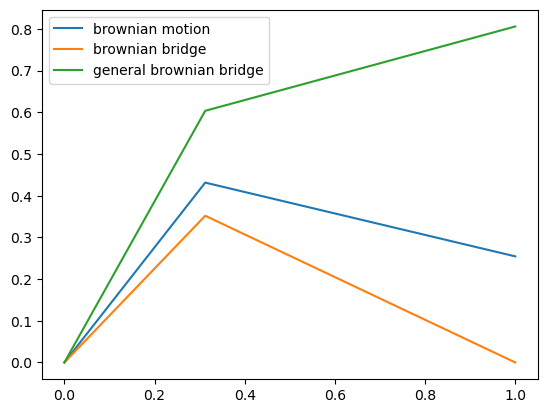

In [439]:
sns.lineplot(x=np.concatenate([[0],points,[t]]),y=bm,label='brownian motion')
sns.lineplot(x=np.concatenate([[0],points,[t]]),y=bb_0,label='brownian bridge')
sns.lineplot(x=np.concatenate([[0],points,[t]]),y=bb,label='general brownian bridge')

/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

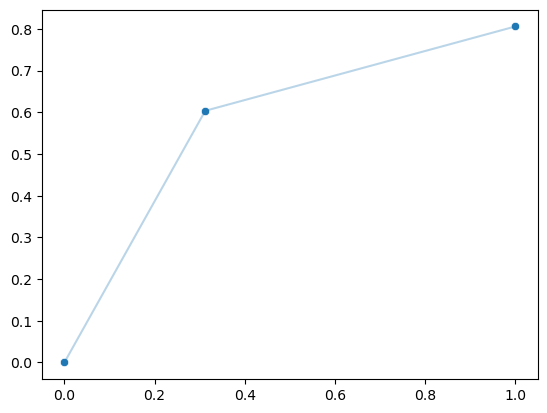

In [440]:
sns.scatterplot(x=x,y=bb)
sns.lineplot(x=x,y=bb,alpha=0.3)